DATASET-1 ->

Data Acquisition

In [2]:
import pandas as pd
import numpy as np

In [3]:
dataset1 = pd.read_csv('dataset_1.csv')
dataset2 = pd.read_excel('dataset_2.xlsx')

In [4]:
dataset1['dteday'] = pd.to_datetime(dataset1['dteday'], errors='coerce')

Data Wrangling

In [5]:
print(dataset1['dteday'].isnull().sum())

333


In [6]:
dataset1.dropna(subset=['dteday'], inplace=True)
print(dataset1['dteday'].dt.year.head())
print(dataset1['dteday'].dt.month.head())

0    2011
1    2011
2    2011
3    2011
4    2011
Name: dteday, dtype: int32
0    1
1    1
2    1
3    1
4    1
Name: dteday, dtype: int32


In [7]:
dataset1['weekday'] = dataset1['dteday'].dt.dayofweek
dataset1['month'] = dataset1['dteday'].dt.month
dataset1['quarter'] = dataset1['dteday'].dt.quarter

In [8]:
dataset1.drop(['dteday'],axis=1,inplace=True)

In [9]:
print(dataset1.describe())

         instant  season     yr   mnth          hr     weekday  weathersit  \
count  277.00000   277.0  277.0  277.0  277.000000  277.000000  277.000000   
mean   139.00000     1.0    0.0    1.0   11.826715    2.935018    1.411552   
std     80.10722     0.0    0.0    0.0    6.868243    1.856081    0.611138   
min      1.00000     1.0    0.0    1.0    0.000000    0.000000    1.000000   
25%     70.00000     1.0    0.0    1.0    6.000000    1.000000    1.000000   
50%    139.00000     1.0    0.0    1.0   12.000000    3.000000    1.000000   
75%    208.00000     1.0    0.0    1.0   18.000000    5.000000    2.000000   
max    277.00000     1.0    0.0    1.0   23.000000    6.000000    3.000000   

             temp       month     quarter  
count  277.000000  277.000000  277.000000  
mean     0.210830    6.483755    2.498195  
std      0.083828    3.445842    1.115193  
min      0.080000    1.000000    1.000000  
25%      0.160000    4.000000    2.000000  
50%      0.200000    7.000000    

In [10]:
dataset1['holiday'] = dataset1['holiday'].map({'Yes': 1, 'No': 0})
dataset1['weekday'] = dataset1['weekday'].map({'Yes': 1, 'No': 0})

In [11]:
print(dataset1.mean())
print(dataset1.median())
print(dataset1.mode())

instant       139.000000
season          1.000000
yr              0.000000
mnth            1.000000
hr             11.826715
holiday              NaN
weekday              NaN
weathersit      1.411552
temp            0.210830
month           6.483755
quarter         2.498195
dtype: float64
instant       139.0
season          1.0
yr              0.0
mnth            1.0
hr             12.0
holiday         NaN
weekday         NaN
weathersit      1.0
temp            0.2
month           7.0
quarter         3.0
dtype: float64
     instant  season   yr  mnth   hr  holiday  weekday  weathersit  temp  \
0          1     1.0  0.0   1.0  0.0      NaN      NaN         1.0   0.2   
1          2     NaN  NaN   NaN  1.0      NaN      NaN         NaN   NaN   
2          3     NaN  NaN   NaN  6.0      NaN      NaN         NaN   NaN   
3          4     NaN  NaN   NaN  7.0      NaN      NaN         NaN   NaN   
4          5     NaN  NaN   NaN  8.0      NaN      NaN         NaN   NaN   
..       ...     ..

In [12]:
print(dataset1.nunique())

instant       277
season          1
yr              1
mnth            1
hr             24
holiday         0
weekday         0
weathersit      3
temp           20
month          12
quarter         4
dtype: int64


In [13]:
print(dataset1.shape)

(277, 11)


In [14]:
print(dataset1.info())

<class 'pandas.core.frame.DataFrame'>
Index: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     277 non-null    int64  
 1   season      277 non-null    int64  
 2   yr          277 non-null    int64  
 3   mnth        277 non-null    int64  
 4   hr          277 non-null    int64  
 5   holiday     0 non-null      float64
 6   weekday     0 non-null      float64
 7   weathersit  277 non-null    int64  
 8   temp        277 non-null    float64
 9   month       277 non-null    int32  
 10  quarter     277 non-null    int32  
dtypes: float64(3), int32(2), int64(6)
memory usage: 23.8 KB
None


DATASET-2 -> 

Data Acquisition

In [15]:
print(dataset2.columns)

Index(['Unnamed: 0', 'instant', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
dataset2.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
print(dataset2.head())


   instant   atemp   hum  windspeed  casual  registered  cnt
0        1  0.2879  0.81        0.0       3          13   16
1        2  0.2727  0.80        0.0       8          32   40
2        3  0.2727  0.80        0.0       5          27   32
3        4  0.2879  0.75        0.0       3          10   13
4        5  0.2879  0.75        0.0       0           1    1


Data Wrangling

In [19]:
print(dataset2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   atemp       599 non-null    float64
 2   hum         610 non-null    float64
 3   windspeed   610 non-null    float64
 4   casual      610 non-null    int64  
 5   registered  610 non-null    int64  
 6   cnt         610 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 33.5 KB
None


In [20]:
print(dataset2.describe())

          instant       atemp         hum   windspeed      casual  registered  \
count  610.000000  599.000000  610.000000  610.000000  610.000000  610.000000   
mean   305.500000    0.199935    0.562475    0.204851    4.501639   51.068852   
std    176.236111    0.078836    0.175440    0.121806    6.319945   47.021204   
min      1.000000    0.000000    0.210000    0.000000    0.000000    0.000000   
25%    153.250000    0.151500    0.432500    0.104500    0.000000   14.000000   
50%    305.500000    0.197000    0.520000    0.194000    2.000000   43.000000   
75%    457.750000    0.242400    0.690000    0.283600    6.000000   70.000000   
max    610.000000    0.454500    1.000000    0.582100   47.000000  247.000000   

              cnt  
count  610.000000  
mean    55.570492  
std     49.316802  
min      1.000000  
25%     16.000000  
50%     47.000000  
75%     79.750000  
max    249.000000  


In [21]:
print(dataset2.dtypes)

instant         int64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object


In [22]:
print(dataset2.isnull().sum())
dataset2.fillna(dataset2.mean(), inplace=True)

instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64


In [23]:
print(dataset2.mean())
print(dataset2.median())
print(dataset2.mode())

instant       305.500000
atemp           0.199935
hum             0.562475
windspeed       0.204851
casual          4.501639
registered     51.068852
cnt            55.570492
dtype: float64
instant       305.500
atemp           0.197
hum             0.520
windspeed       0.194
casual          2.000
registered     43.000
cnt            47.000
dtype: float64
     instant  atemp   hum  windspeed  casual  registered  cnt
0          1  0.197  0.47     0.1642     0.0         1.0  1.0
1          2    NaN   NaN        NaN     NaN         NaN  NaN
2          3    NaN   NaN        NaN     NaN         NaN  NaN
3          4    NaN   NaN        NaN     NaN         NaN  NaN
4          5    NaN   NaN        NaN     NaN         NaN  NaN
..       ...    ...   ...        ...     ...         ...  ...
605      606    NaN   NaN        NaN     NaN         NaN  NaN
606      607    NaN   NaN        NaN     NaN         NaN  NaN
607      608    NaN   NaN        NaN     NaN         NaN  NaN
608      609    NaN  

In [24]:
dataset2['instant'] = pd.to_datetime(dataset2['instant'], unit='s')

In [25]:
dataset2['hour'] = dataset2['instant'].dt.hour
dataset2['day'] = dataset2['instant'].dt.day
dataset2['month'] = dataset2['instant'].dt.month
dataset2['year'] = dataset2['instant'].dt.year

In [26]:
dataset2.drop('instant', axis=1, inplace=True)

In [27]:
print(dataset2.describe())

            atemp         hum   windspeed      casual  registered         cnt  \
count  610.000000  610.000000  610.000000  610.000000  610.000000  610.000000   
mean     0.199935    0.562475    0.204851    4.501639   51.068852   55.570492   
std      0.078120    0.175440    0.121806    6.319945   47.021204   49.316802   
min      0.000000    0.210000    0.000000    0.000000    0.000000    1.000000   
25%      0.151500    0.432500    0.104500    0.000000   14.000000   16.000000   
50%      0.197000    0.520000    0.194000    2.000000   43.000000   47.000000   
75%      0.227300    0.690000    0.283600    6.000000   70.000000   79.750000   
max      0.454500    1.000000    0.582100   47.000000  247.000000  249.000000   

        hour    day  month    year  
count  610.0  610.0  610.0   610.0  
mean     0.0    1.0    1.0  1970.0  
std      0.0    0.0    0.0     0.0  
min      0.0    1.0    1.0  1970.0  
25%      0.0    1.0    1.0  1970.0  
50%      0.0    1.0    1.0  1970.0  
75%      0.

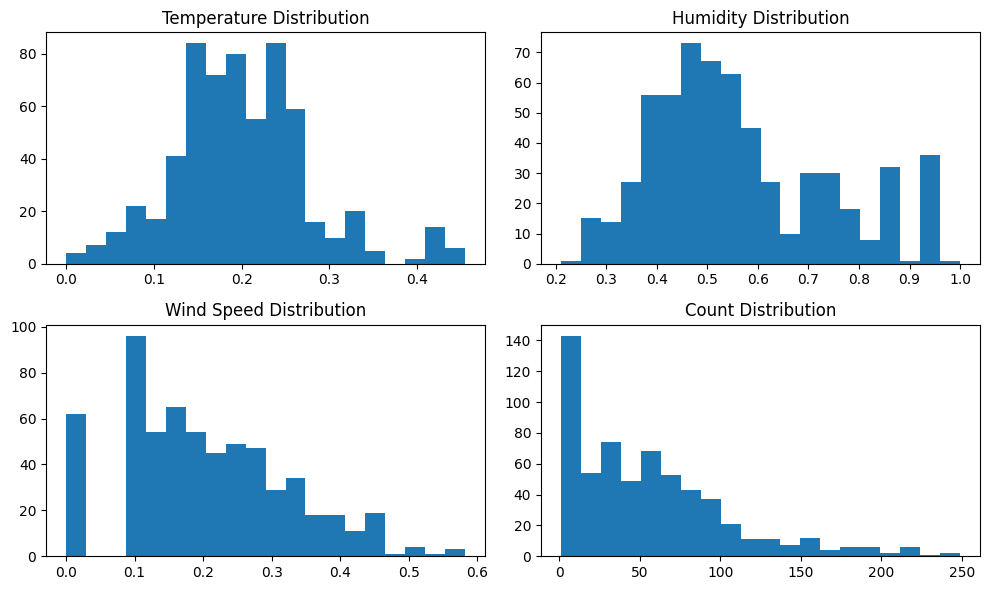

In [28]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.hist(dataset2['atemp'], bins=20)
plt.title('Temperature Distribution')

plt.subplot(2, 2, 2)
plt.hist(dataset2['hum'], bins=20)
plt.title('Humidity Distribution')

plt.subplot(2, 2, 3)
plt.hist(dataset2['windspeed'], bins=20)
plt.title('Wind Speed Distribution')

plt.subplot(2, 2, 4)
plt.hist(dataset2['cnt'], bins=20)
plt.title('Count Distribution')
plt.tight_layout()
plt.show()

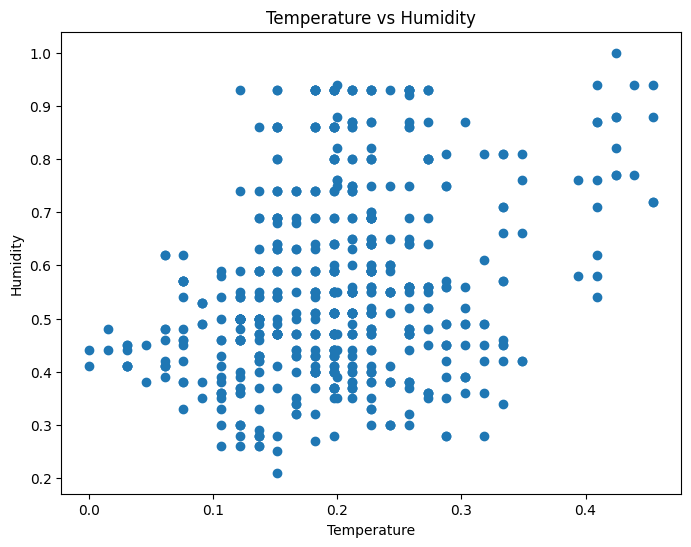

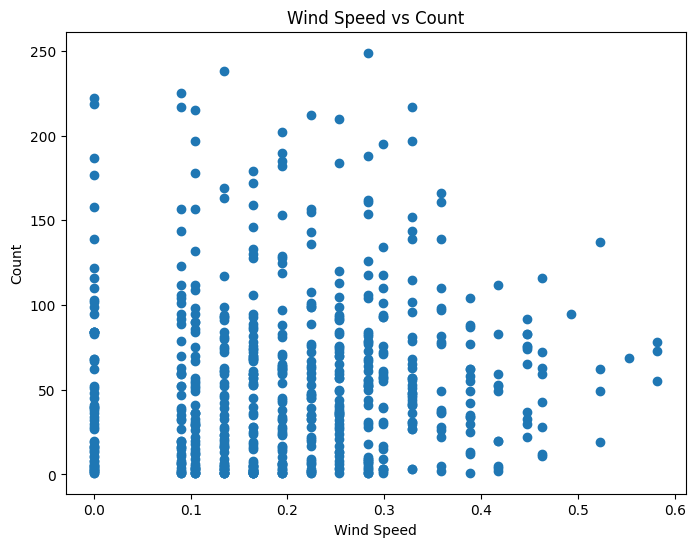

In [29]:
plt.figure(figsize=(8,6))
plt.scatter(dataset2['atemp'], dataset2['hum'])
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(dataset2['windspeed'], dataset2['cnt'])
plt.title('Wind Speed vs Count')
plt.xlabel('Wind Speed')
plt.ylabel('Count')
plt.show()

In [30]:
print(dataset1.dtypes)
print(dataset2.dtypes)

instant         int64
season          int64
yr              int64
mnth            int64
hr              int64
holiday       float64
weekday       float64
weathersit      int64
temp          float64
month           int32
quarter         int32
dtype: object
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
hour            int32
day             int32
month           int32
year            int32
dtype: object


In [31]:
dataset2[['hour', 'day', 'month', 'year']] = dataset2[['hour', 'day', 'month', 'year']].astype('int64')

In [32]:
dataset2 = dataset2.rename(columns={'atemp': 'temp'})

COMBINING DATASET-1 & DATASET-2 ->

In [33]:
combine_data1 = pd.concat([dataset1, dataset2], ignore_index=True)

In [34]:
print(combine_data1.info())
print(combine_data1.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     277 non-null    float64
 1   season      277 non-null    float64
 2   yr          277 non-null    float64
 3   mnth        277 non-null    float64
 4   hr          277 non-null    float64
 5   holiday     0 non-null      float64
 6   weekday     0 non-null      float64
 7   weathersit  277 non-null    float64
 8   temp        887 non-null    float64
 9   month       887 non-null    int64  
 10  quarter     277 non-null    float64
 11  hum         610 non-null    float64
 12  windspeed   610 non-null    float64
 13  casual      610 non-null    float64
 14  registered  610 non-null    float64
 15  cnt         610 non-null    float64
 16  hour        610 non-null    float64
 17  day         610 non-null    float64
 18  year        610 non-null    float64
dtypes: float64(18), int64(1)
memo

In [35]:
print(combine_data1.duplicated().sum())

4


In [36]:
print(combine_data1.dtypes)

instant       float64
season        float64
yr            float64
mnth          float64
hr            float64
holiday       float64
weekday       float64
weathersit    float64
temp          float64
month           int64
quarter       float64
hum           float64
windspeed     float64
casual        float64
registered    float64
cnt           float64
hour          float64
day           float64
year          float64
dtype: object


In [37]:
combine_data1 = combine_data1.drop_duplicates()

In [38]:
combine_data1 = combine_data1.dropna()

In [39]:
print(combine_data1.info())
print(combine_data1.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     0 non-null      float64
 1   season      0 non-null      float64
 2   yr          0 non-null      float64
 3   mnth        0 non-null      float64
 4   hr          0 non-null      float64
 5   holiday     0 non-null      float64
 6   weekday     0 non-null      float64
 7   weathersit  0 non-null      float64
 8   temp        0 non-null      float64
 9   month       0 non-null      int64  
 10  quarter     0 non-null      float64
 11  hum         0 non-null      float64
 12  windspeed   0 non-null      float64
 13  casual      0 non-null      float64
 14  registered  0 non-null      float64
 15  cnt         0 non-null      float64
 16  hour        0 non-null      float64
 17  day         0 non-null      float64
 18  year        0 non-null      float64
dtypes: float64(18), int64(1)
memory usage: 0.0 byt

c:\Users\Surabhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\Surabhi\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


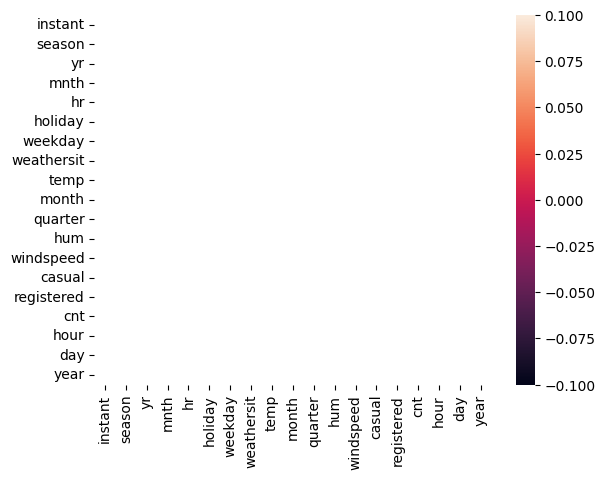

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = combine_data1.corr()
sns.heatmap(corr, annot=True)
plt.show()


DATASET-3 ->

Data Acquisition

In [41]:
dataset3 = pd.read_csv('dataset_3.csv')

In [42]:
import pandas as pd
import numpy as np
from scipy import stats

Data Wrangling

In [43]:
print(dataset3.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [44]:
dataset3.drop('atemp', axis=1, inplace=True)

In [45]:
dataset3.drop('instant', axis=1, inplace=True)

In [46]:
dataset3['dteday'] = pd.to_datetime(dataset3['dteday'], dayfirst=True)
dataset3['day'] = dataset3['dteday'].dt.day
dataset3['month'] = dataset3['dteday'].dt.month
dataset3['year'] = dataset3['dteday'].dt.year
dataset3['dayofweek'] = dataset3['dteday'].dt.dayofweek

In [47]:
dataset3.drop('dteday', axis=1, inplace=True)

In [48]:
dataset3.drop(['yr', 'day', 'month', 'dayofweek'], axis=1, inplace=True)

In [49]:
print(dataset3.head(3))

   season  mnth  hr  holiday  weekday  weathersit  temp   hum  windspeed  \
0       1     1   1    False        6           1  0.22  0.64     0.1940   
1       1     1   2    False        6           1  0.22  0.64     0.1642   
2       1     1   3    False        6           1  0.20  0.64     0.1343   

   casual  registered  cnt  year  
0       0          20   20  2011  
1       0          15   15  2011  
2       3           5    8  2011  


In [50]:
print(dataset3.dtypes)

season          int64
mnth            int64
hr              int64
holiday          bool
weekday         int64
weathersit      int64
temp          float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
year            int32
dtype: object


In [51]:
print(dataset3.describe())

       season        mnth          hr     weekday  weathersit        temp  \
count   390.0  390.000000  390.000000  390.000000  390.000000  390.000000   
mean      1.0    1.800000   11.687179    2.989744    1.484615    0.220000   
std       0.0    0.400514    6.980295    2.149884    0.663805    0.073095   
min       1.0    1.000000    0.000000    0.000000    1.000000    0.060000   
25%       1.0    2.000000    6.000000    1.000000    1.000000    0.160000   
50%       1.0    2.000000   12.000000    3.000000    1.000000    0.220000   
75%       1.0    2.000000   18.000000    5.000000    2.000000    0.260000   
max       1.0    2.000000   23.000000    6.000000    3.000000    0.420000   

              hum   windspeed      casual  registered         cnt    year  
count  390.000000  390.000000  390.000000  390.000000  390.000000   390.0  
mean     0.613769    0.179416    5.576923   57.002564   62.579487  2011.0  
std      0.202361    0.138551    9.317478   49.070198   53.274838     0.0  
mi

In [52]:
dataset3.fillna(dataset3.mean(), inplace=True)

In [53]:
numeric_cols = dataset3.select_dtypes(include=[np.number])
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
dataset3_filtered = dataset3[~((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))).any(axis=1)]

In [54]:
print(dataset3_filtered.shape)
print(dataset3_filtered.head())

(271, 13)
    season  mnth  hr  holiday  weekday  weathersit  temp   hum  windspeed  \
69       1     2   0    False        2           2  0.16  0.64     0.1045   
70       1     2   1    False        2           2  0.16  0.69     0.1045   
71       1     2   2    False        2           2  0.16  0.69     0.0000   
72       1     2   3    False        2           2  0.16  0.69     0.0000   
73       1     2   5    False        2           3  0.14  0.93     0.0000   

    casual  registered  cnt  year  
69       2           6    8  2011  
70       0           3    3  2011  
71       0           2    2  2011  
72       0           2    2  2011  
73       0           3    3  2011  


Combining dataset-1 , dataset-2 , & dataset-3 ->

In [55]:
combine_data2 = pd.concat([combine_data1, dataset3_filtered], ignore_index=True)

In [56]:
print(combine_data2.shape)

(271, 19)


In [57]:
print(combine_data2.head(3))

   instant  season  yr  mnth   hr holiday  weekday  weathersit  temp  month  \
0      NaN     1.0 NaN   2.0  0.0     0.0      2.0         2.0  0.16    NaN   
1      NaN     1.0 NaN   2.0  1.0     0.0      2.0         2.0  0.16    NaN   
2      NaN     1.0 NaN   2.0  2.0     0.0      2.0         2.0  0.16    NaN   

   quarter   hum  windspeed  casual  registered  cnt  hour  day    year  
0      NaN  0.64     0.1045     2.0         6.0  8.0   NaN  NaN  2011.0  
1      NaN  0.69     0.1045     0.0         3.0  3.0   NaN  NaN  2011.0  
2      NaN  0.69     0.0000     0.0         2.0  2.0   NaN  NaN  2011.0  


In [58]:
print(combine_data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     0 non-null      float64
 1   season      271 non-null    float64
 2   yr          0 non-null      float64
 3   mnth        271 non-null    float64
 4   hr          271 non-null    float64
 5   holiday     271 non-null    object 
 6   weekday     271 non-null    float64
 7   weathersit  271 non-null    float64
 8   temp        271 non-null    float64
 9   month       0 non-null      float64
 10  quarter     0 non-null      float64
 11  hum         271 non-null    float64
 12  windspeed   271 non-null    float64
 13  casual      271 non-null    float64
 14  registered  271 non-null    float64
 15  cnt         271 non-null    float64
 16  hour        0 non-null      float64
 17  day         0 non-null      float64
 18  year        271 non-null    float64
dtypes: float64(18), object(1)
mem

In [59]:
print(combine_data2.describe())

       instant  season   yr   mnth          hr     weekday  weathersit  \
count      0.0   271.0  0.0  271.0  271.000000  271.000000  271.000000   
mean       NaN     1.0  NaN    2.0   11.169742    3.180812    1.535055   
std        NaN     0.0  NaN    0.0    7.300987    1.891639    0.713409   
min        NaN     1.0  NaN    2.0    0.000000    0.000000    1.000000   
25%        NaN     1.0  NaN    2.0    5.000000    2.000000    1.000000   
50%        NaN     1.0  NaN    2.0   11.000000    3.000000    1.000000   
75%        NaN     1.0  NaN    2.0   18.000000    5.000000    2.000000   
max        NaN     1.0  NaN    2.0   23.000000    6.000000    3.000000   

             temp  month  quarter         hum   windspeed      casual  \
count  271.000000    0.0      0.0  271.000000  271.000000  271.000000   
mean     0.212841    NaN      NaN    0.625461    0.179221    2.963100   
std      0.070198    NaN      NaN    0.214555    0.141021    2.998537   
min      0.060000    NaN      NaN    0.21

Data Wrangling

In [60]:
print(combine_data2.isnull().sum())

instant       271
season          0
yr            271
mnth            0
hr              0
holiday         0
weekday         0
weathersit      0
temp            0
month         271
quarter       271
hum             0
windspeed       0
casual          0
registered      0
cnt             0
hour          271
day           271
year            0
dtype: int64


In [61]:
combine_data2.drop(columns=['month'], inplace=True)

In [62]:
combine_data2.drop(columns=['instant'], inplace=True)

In [63]:
combine_data2.drop(columns=['yr'], inplace=True)

In [64]:
combine_data2.drop(columns=['hour'], inplace=True)

In [65]:
combine_data2.drop(columns=['quarter', 'day'], inplace=True)

In [66]:
print(combine_data2.isnull().sum())

season        0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
year          0
dtype: int64


In [67]:
combine_data2.rename(columns={'mnth': 'month', 'hr': 'hour', 'cnt': 'count'}, inplace=True)

In [68]:
print(combine_data2.isnull().sum())

season        0
month         0
hour          0
holiday       0
weekday       0
weathersit    0
temp          0
hum           0
windspeed     0
casual        0
registered    0
count         0
year          0
dtype: int64


In [69]:
print(combine_data2.dtypes)

season        float64
month         float64
hour          float64
holiday        object
weekday       float64
weathersit    float64
temp          float64
hum           float64
windspeed     float64
casual        float64
registered    float64
count         float64
year          float64
dtype: object


Renaming it to Cleaned_data

In [70]:
Cleaned_data = combine_data2

In [81]:
Cleaned_data.describe()

,hour,weekday,weathersit,temp,hum,windspeed,casual,registered,count
count,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000,271.000000
mean,11.169742,3.180812,1.535055,0.212841,0.625461,0.179221,2.963100,48.822878,51.785978
std,7.300987,1.891639,0.713409,0.070198,0.214555,0.141021,2.998537,43.319891,44.581660
min,0.000000,0.000000,1.000000,0.060000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,5.000000,2.000000,1.000000,0.160000,0.430000,0.089600,1.000000,10.000000,12.000000
50%,11.000000,3.000000,1.000000,0.220000,0.610000,0.164200,2.000000,43.000000,47.000000
75%,18.000000,5.000000,2.000000,0.240000,0.810000,0.283600,4.500000,66.500000,72.000000
max,23.000000,6.000000,3.000000,0.400000,1.000000,0.552200,13.000000,183.000000,190.000000


Skewness analysis :-

In [71]:
print(Cleaned_data.skew())

season             0.0
month              0.0
hour          0.097274
holiday            0.0
weekday      -0.090773
weathersit    0.954792
temp          0.414295
hum           0.164515
windspeed      0.61636
casual        1.190867
registered    1.131515
count         1.055363
year               0.0
dtype: object


Correlation Analysis :-

In [72]:
pd.get_dummies(Cleaned_data, columns=['holiday'])

,season,month,hour,weekday,weathersit,temp,hum,windspeed,casual,registered,count,year,holiday_0.0
0,1.0,2.0,0.0,2.0,2.0,0.16,0.64,0.1045,2.0,6.0,8.0,2011.0,True
1,1.0,2.0,1.0,2.0,2.0,0.16,0.69,0.1045,0.0,3.0,3.0,2011.0,True
2,1.0,2.0,2.0,2.0,2.0,0.16,0.69,0.0000,0.0,2.0,2.0,2011.0,True
3,1.0,2.0,3.0,2.0,2.0,0.16,0.69,0.0000,0.0,2.0,2.0,2011.0,True
4,1.0,2.0,5.0,2.0,3.0,0.14,0.93,0.0000,0.0,3.0,3.0,2011.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,1.0,2.0,3.0,1.0,1.0,0.34,0.46,0.2239,1.0,1.0,2.0,2011.0,True
267,1.0,2.0,4.0,1.0,1.0,0.32,0.53,0.2836,0.0,2.0,2.0,2011.0,True
268,1.0,2.0,5.0,1.0,1.0,0.32,0.53,0.2836,0.0,3.0,3.0,2011.0,True
269,1.0,2.0,6.0,1.0,1.0,0.34,0.46,0.2985,1.0,25.0,26.0,2011.0,True


Spearman's rank correlation coefficient

In [73]:
constant_columns = Cleaned_data.columns[Cleaned_data.nunique() == 1]
print(constant_columns)

Index(['season', 'month', 'holiday', 'year'], dtype='object')


In [74]:
Cleaned_data = Cleaned_data.drop(columns=constant_columns)

In [75]:
from scipy.stats import spearmanr
print(spearmanr(Cleaned_data).correlation)

[[ 1.          0.06463259 -0.10844044  0.23419554 -0.20716828  0.10733361
   0.46092695  0.57801066  0.57944119]
 [ 0.06463259  1.          0.08087047 -0.32097265  0.04425297 -0.01522856
   0.03426196  0.10426832  0.09872648]
 [-0.10844044  0.08087047  1.          0.01057044  0.58211109 -0.25702633
  -0.13010782 -0.09619319 -0.09442539]
 [ 0.23419554 -0.32097265  0.01057044  1.          0.08328919  0.15076353
   0.35481101  0.11775397  0.13743936]
 [-0.20716828  0.04425297  0.58211109  0.08328919  1.         -0.43895613
  -0.19883892 -0.21797024 -0.21872804]
 [ 0.10733361 -0.01522856 -0.25702633  0.15076353 -0.43895613  1.
   0.04816645  0.17147426  0.1652534 ]
 [ 0.46092695  0.03426196 -0.13010782  0.35481101 -0.19883892  0.04816645
   1.          0.55959598  0.61027406]
 [ 0.57801066  0.10426832 -0.09619319  0.11775397 -0.21797024  0.17147426
   0.55959598  1.          0.99649419]
 [ 0.57944119  0.09872648 -0.09442539  0.13743936 -0.21872804  0.1652534
   0.61027406  0.99649419  1.  

Spearman Rank Correlation Heatmap :-

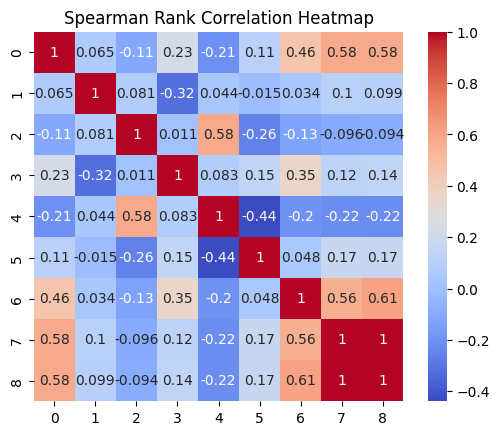

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = spearmanr(Cleaned_data).correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Spearman Rank Correlation Heatmap')
plt.savefig('spearman_rank_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

Histograms of Data :-

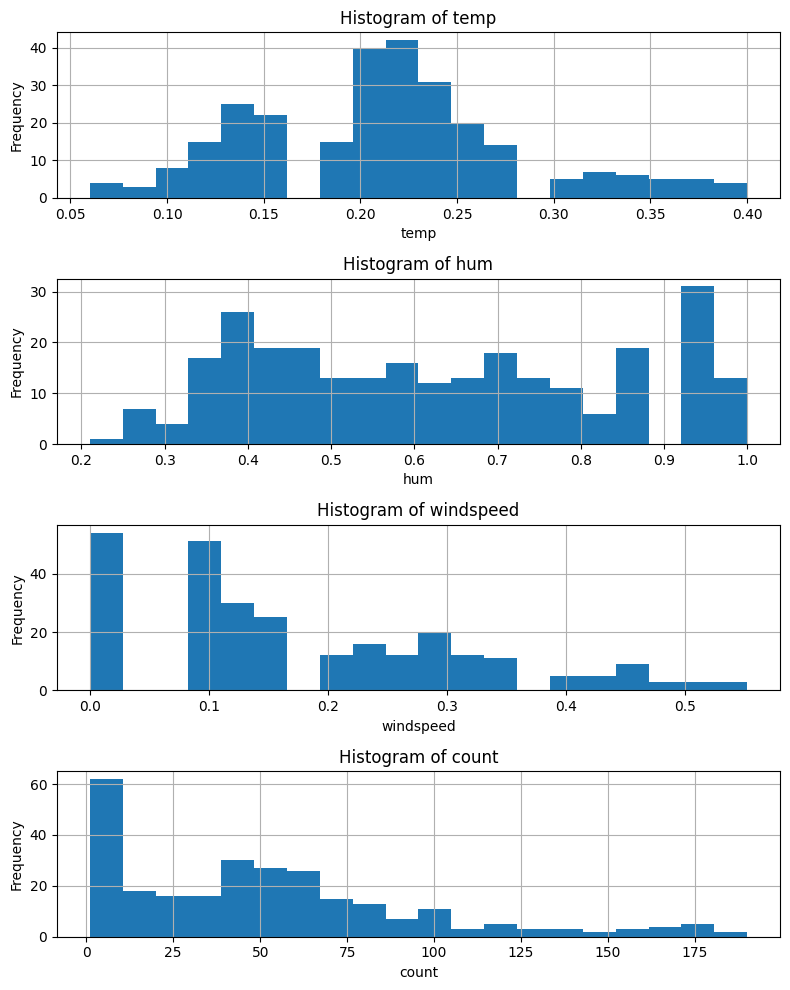

In [84]:

key_features = ['temp', 'hum', 'windspeed', 'count']
fig, axes = plt.subplots(nrows=len(key_features), figsize=(8, 10))
for i, feature in enumerate(key_features):
    Cleaned_data[feature].hist(ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.savefig('histograms.png', dpi=300, bbox_inches='tight')
plt.show()

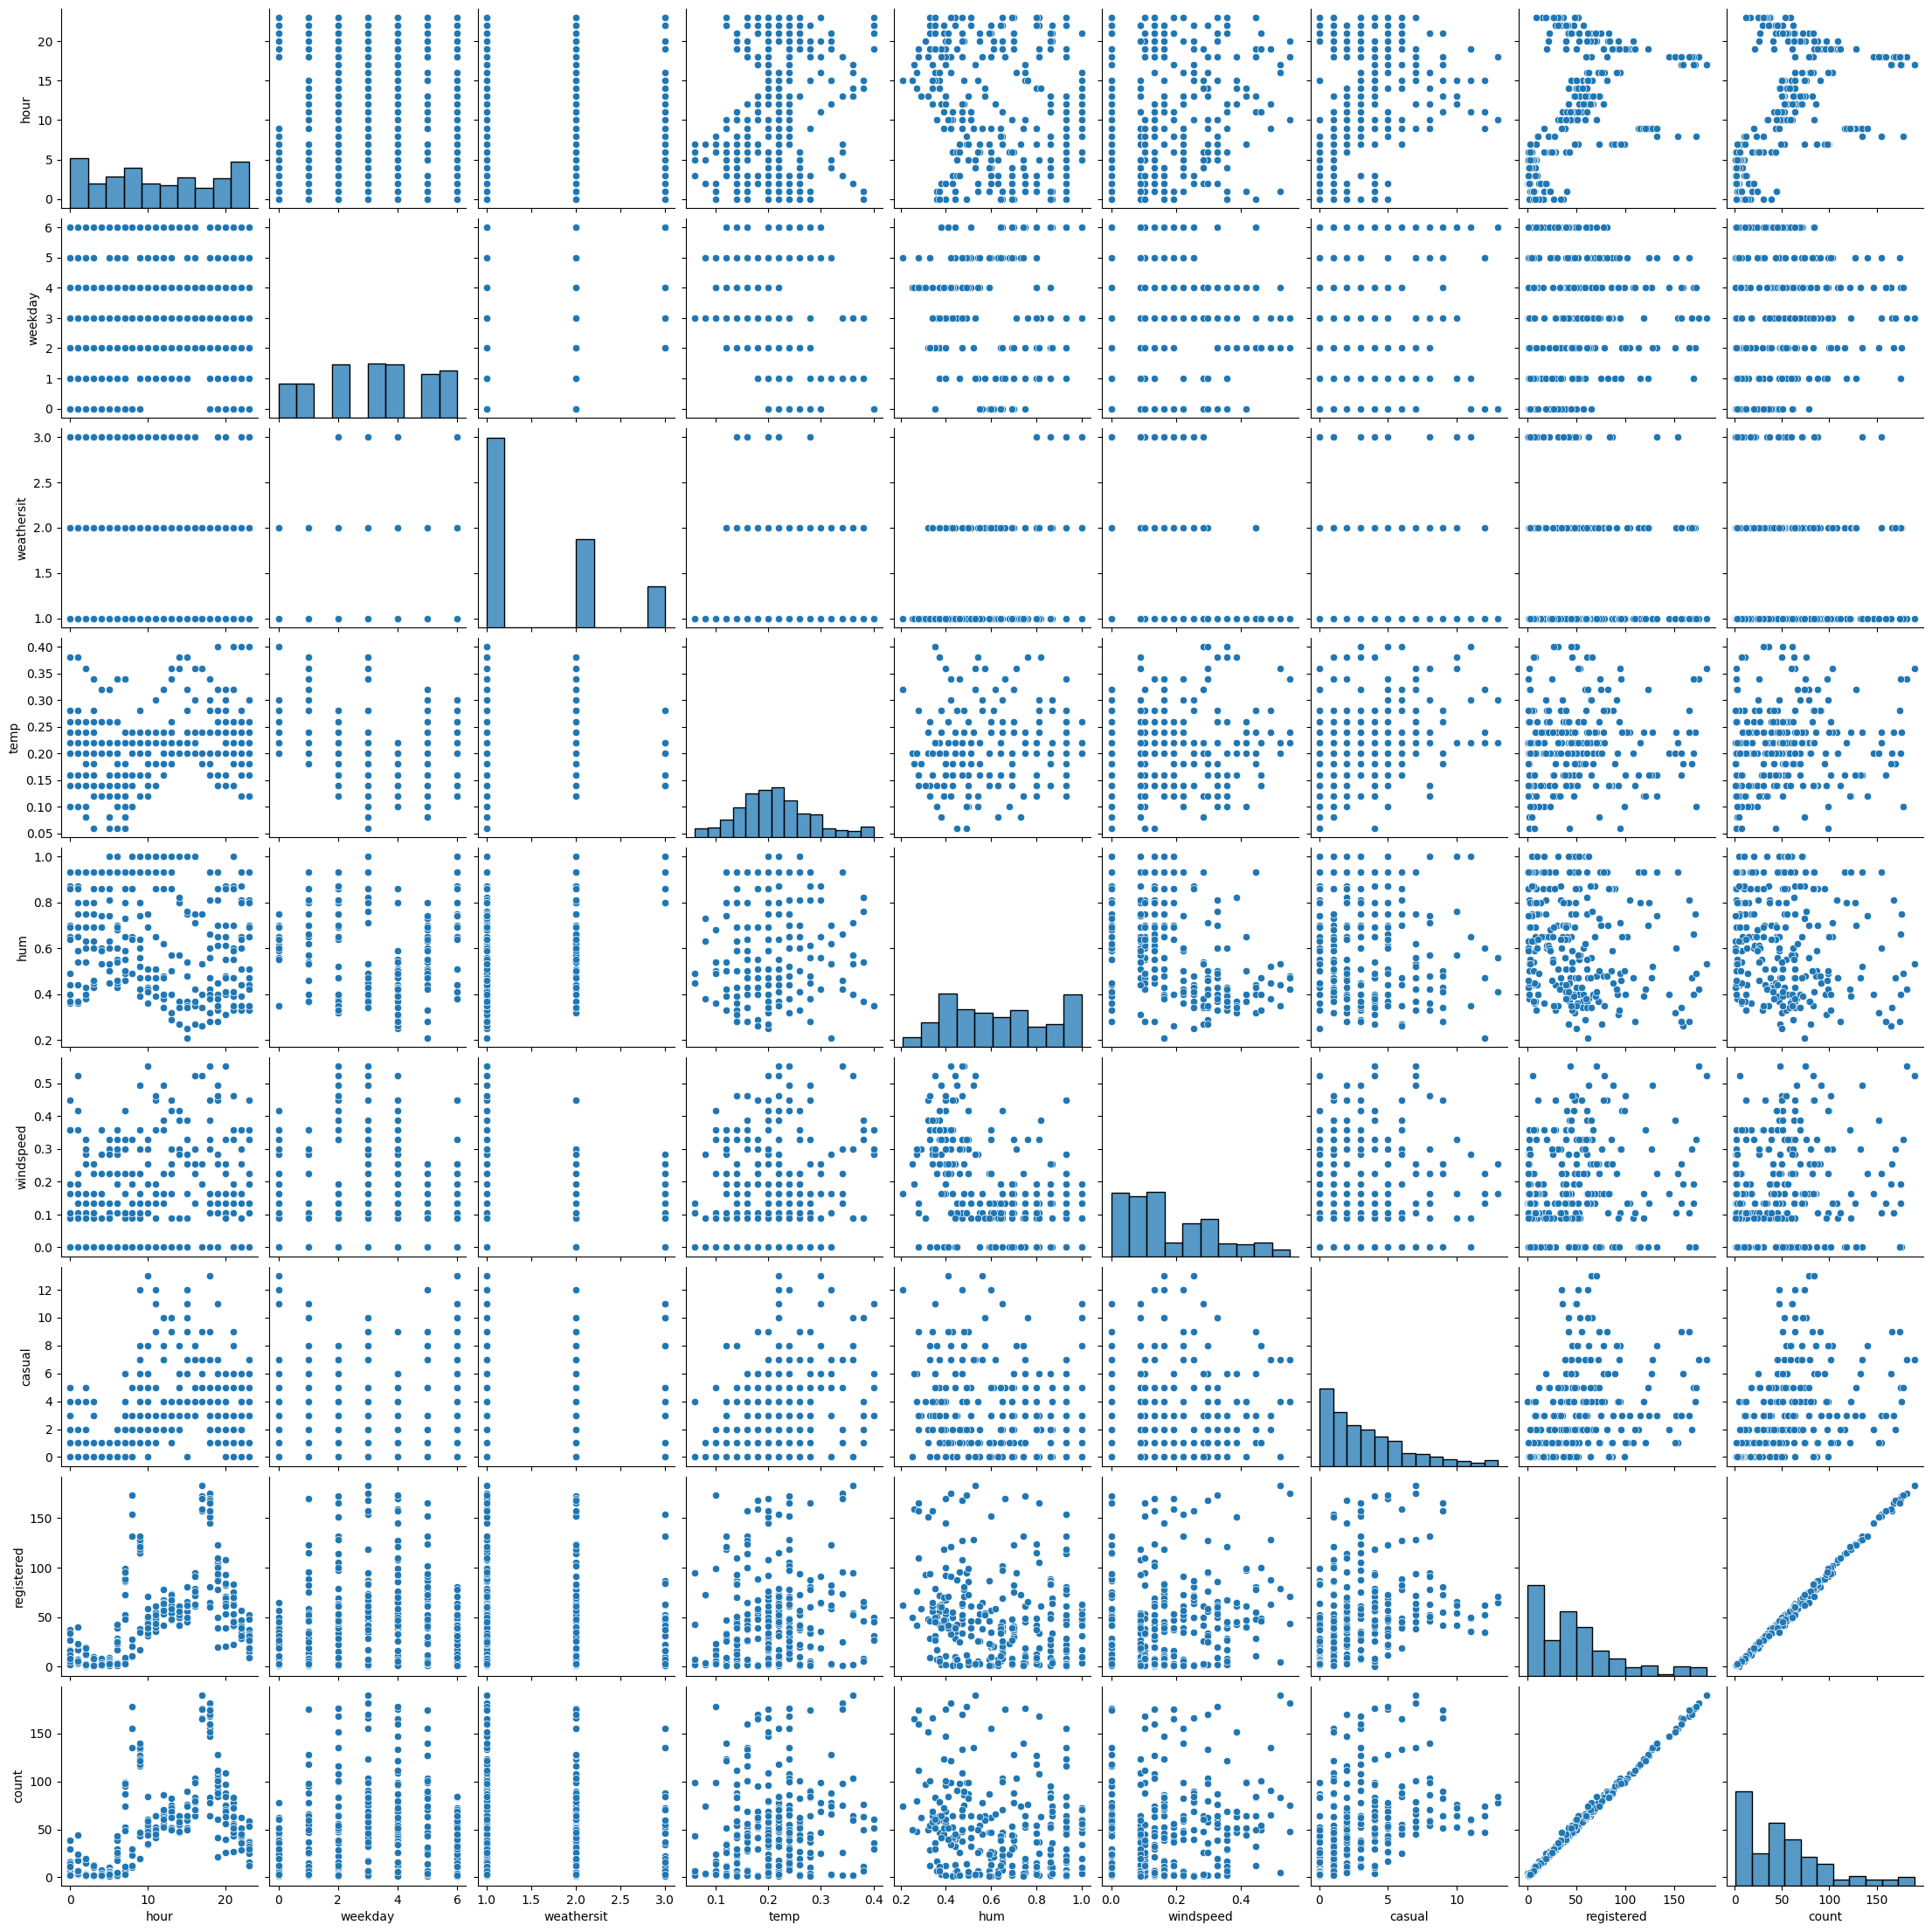

In [77]:
sns.pairplot(Cleaned_data)
plt.savefig('pair_plot.png', dpi=300, bbox_inches='tight')
plt.show()